# Time Series Analysis of NAICS

The North American Industry Classification System(NAICS) is an industry classification system developed by the statistical agencies of Canada,Mexico, and the United States. NAICS is designed to provide common definitions of the industrial structure of the three countries and a common statistical framework to facilitate the
analysis of the three economies. In this notebook, we will perform an analysis of this time series data.

## I. Download dataset
This notebook is a project given in part of data insight program which you can download the statement here:https://raw.githubusercontent.com/tderick/Time-serie-analysis-of-NAICS/main/Project_Time%20Series%20Analysis%20of%20NAICS.pdf

You can download dataset using this link: https://raw.githubusercontent.com/tderick/Time-serie-analysis-of-NAICS/main/A_NEWLY_HIRED_DATA_ANALYST.zip

## II. Preparation of datasets
NAICS is composed of multiple files. In that case, we must deal with multiple sources of data to create the data set for our analysis.

We have 15 CSV files beginning with RTRA(Real-Time Remote Access). These files contain employment data by industry at different levels of aggregation; 2-digit NAICS, 3-digit NAICS, and 4-digit NAICS. We will process these files based on their level of aggregation.

### II.1. NAICS 2
NAICS2 is a set of 5 RTRA files at 2-digit of NAICS code. We will load all those files in one DataFrame with pandas.

In [1]:
import pandas as pd
naics2_files_list = ['RTRA_Employ_2NAICS_97_99.csv','RTRA_Employ_2NAICS_00_05.csv','RTRA_Employ_2NAICS_06_10.csv','RTRA_Employ_2NAICS_11_15.csv','RTRA_Employ_2NAICS_16_20.csv']
naics2_df = pd.concat(map(pd.read_csv,naics2_files_list), ignore_index=True)
naics2_df.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Accommodation and food services [72],129250
1,1997,1,"Administrative and support, waste management a...",58500
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250
3,1997,1,"Arts, entertainment and recreation [71]",38750
4,1997,1,Construction [23],118000


The column NAICS is a composition of the Industry name and associated NAICS code in the bracket. We will create a new column with only NAICS code extracted from the NAICS column.

In [2]:
naics2_df['naics_code'] = naics2_df.NAICS.str.split('[').map(lambda x: x[1].strip(']'))
naics2_df.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,naics_code
0,1997,1,Accommodation and food services [72],129250,72
1,1997,1,"Administrative and support, waste management a...",58500,56
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250,11
3,1997,1,"Arts, entertainment and recreation [71]",38750,71
4,1997,1,Construction [23],118000,23


#### Creation of utility function to pre-process data

In [3]:
def process_RTRA(naics_code_list, naics_code_dict, naics_df):
    dataframe = [naics_df,]

    for key in naics_code_dict.keys():
        naics=naics_df[naics_df.naics_code.isin(naics_code_dict[key])].groupby(['SYEAR','SMTH'], as_index=False).agg('sum')
        naics['naics_code'] = key
        dataframe.append(naics)

    naics_final = pd.concat(dataframe, ignore_index=True)

    return naics_final[naics_final.naics_code.isin(naics_code_list)]

After defining our function, we will able to respect DRY(Don't Repeat Yourself) principle throughout this notebook. It is time to use it with naics2 dataframe.

In [64]:
naics_code_list = ['22','23','41','53','81','55 & 56']
naics_code_dict={'55 & 56':['55','56']}

naics2_df_final = process_RTRA(naics_code_list,naics_code_dict,naics2_df)
naics2_df_final= naics2_df_final.drop(columns=["NAICS"])
naics2_df_final.head()

,SYEAR,SMTH,_EMPLOYMENT_,naics_code
4,1997,1,118000,23
12,1997,1,89250,81
15,1997,1,50750,53
18,1997,1,9750,22
19,1997,1,72000,41


### II.1. NAICS 3
It is time to threat NAICS 3 data.

In [5]:
naics3_files = ['RTRA_Employ_3NAICS_97_99.csv','RTRA_Employ_3NAICS_00_05.csv','RTRA_Employ_3NAICS_06_10.csv','RTRA_Employ_3NAICS_11_15.csv','RTRA_Employ_3NAICS_16_20.csv']
naics3_df = pd.concat(map(pd.read_csv,naics3_files), ignore_index=True)
naics3_df['naics_code'] = naics3_df.NAICS.map(lambda x: x.split('[')[-1].strip(']'))

Our new naics_code column contains two anomalies. Indeed, <b><<Securities, commodity contracts, and other financial investment and related acti>></b> don't have NAICS code in front of it. When we check the "NAICS-2017 - Statistics-Canada" pdf file, we constate that the associate NAICS code is 523. We will replace all cells containing this string with this number. Moreover, we have the value "Other" in the naics_code column and we will replace it by 81  in all cells where he appears.

In [6]:
naics3_df.naics_code.replace('Securities, commodity contracts, and other financial investment and related acti','523', inplace=True)
naics3_df.naics_code.replace('Other','81', inplace=True)

In [7]:
naics_code_list2 = ['111 & 112','114','113','115','211','213','212','311 & 312','321', '322', '331',
                    '332', '333','313, 314, 315, 316, 323, 324, 325, 326, 327, 334, 335, 337 & 339','441', 
                    '446','442,443,444,445,446,447,448,451,452,453 & 454','481', '482', '483', '484', '488', 
                    '491 & 492', '485,486 & 487', '493', '524','521, 522, 523 & 526','621', '622', '623', '624',
                    '511', '512', '517','515, 518 & 519', '711', '713', '712', '721', '722', '911', '912',
                    '913, 914 & 919']


naics_code_dict2 = {
    '313, 314, 315, 316, 323, 324, 325, 326, 327, 334, 335, 337 & 339':['313', '314', '315', '316', '323', '324', '325', '326', '327', '334', '335', '337','339'],
    '111 & 112':['111','112'],
     '311 & 312':['311','312'],
    '442,443,444,445,446,447,448,451,452,453 & 454':['442','443','444','445','446','447','448','451','452','453','454'],
    '491 & 492':['491','492'],
    '485,486 & 487':['485','486','487'],
    '521, 522, 523 & 526':['521', '522','523','526'],
    '515, 518 & 519':['515', '518','519'],
    '913, 914 & 919':['913', '914', '919']
}
naics3_df_final = process_RTRA(naics_code_list2,naics_code_dict2,naics3_df)
naics3_df_final.drop(columns="NAICS", inplace=True)

### II.3. NAICS 4

In [8]:
naics4_file = ['RTRA_Employ_4NAICS_97_99.csv','RTRA_Employ_4NAICS_00_05.csv','RTRA_Employ_4NAICS_06_10.csv','RTRA_Employ_4NAICS_11_15.csv','RTRA_Employ_4NAICS_16_20.csv']
naics4_df = pd.concat(map(pd.read_csv,naics4_file), ignore_index=True)
naics4_df.NAICS = naics4_df.NAICS.astype('str')
naics4_df.rename(columns={"NAICS":"naics_code"}, inplace=True)

naics_code_list3 = ['3366','3361,  3362,  3363, 3364, 3365, 3369', '5413', '5415', '5416','5411, 5412, 5414, 5417, 5418 & 5419','6111', '6112', '6113','6114, 6115, 6116 & 6117']
naics_code_dict3 = {
    '3361,  3362,  3363, 3364, 3365, 3369':['3361',  '3362',  '3363', '3364', '3365', '3369'],
    '5411, 5412, 5414, 5417, 5418 & 5419':['5411', '5412', '5414', '5417', '5418', '5419'],
    '6114, 6115, 6116 & 6117':['6114', '6115', '6116', '6117']
}

naics4_df_final = process_RTRA(naics_code_list3,naics_code_dict3,naics4_df)
naics4_df_final.head()

,SYEAR,SMTH,naics_code,_EMPLOYMENT_
117,1997,1,3366,3500
236,1997,1,5413,27000
238,1997,1,5415,18250
239,1997,1,5416,16250
254,1997,1,6111,78250


### Concatenation of all three NAICS dataframe.

In [9]:
all_naics_df = pd.concat([naics2_df_final,naics3_df_final,naics4_df_final],ignore_index=True)
all_naics_df.rename(columns={"_EMPLOYMENT_":"Employment"}, inplace=True)

The data output just contains data from 1997 to 2018. In this case, we are going to delete all rows concernin 2019.

In [10]:
all_naics_df=all_naics_df[~(all_naics_df.SYEAR==2019)]

The data output didn't contains NAICS code. We will merge LMO_Detailed_Industries_by_NAICS with it to have NAICS code.

In [11]:
lmo_df = pd.read_excel('LMO_Detailed_Industries_by_NAICS.xlsx')
data_output_df = pd.read_excel('Data_Output_Template.xlsx')
data_output_with_naics_code = data_output_df.merge(lmo_df,how="left",sort=True,on="LMO_Detailed_Industry")
data_output_with_naics_code.drop(columns=['Employment'], inplace=True)
data_output_with_naics_code.NAICS = data_output_with_naics_code.NAICS.astype('str')

#### Fill Data Output Templat2


In [84]:

final_data_output = data_output_with_naics_code.merge(all_naics_df,how="left",left_on=['SYEAR','SMTH','NAICS'], right_on=['SYEAR','SMTH','naics_code'])
final_data_output

,SYEAR,SMTH,LMO_Detailed_Industry,NAICS,Employment,naics_code
0,1997,1,Accommodation services,721,24000,721
1,1997,2,Accommodation services,721,24250,721
2,1997,3,Accommodation services,721,27750,721
3,1997,4,Accommodation services,721,29750,721
4,1997,5,Accommodation services,721,34000,721
...,...,...,...,...,...,...
15571,2018,8,Wood product manufacturing,321,28250,321
15572,2018,9,Wood product manufacturing,321,26000,321
15573,2018,10,Wood product manufacturing,321,25250,321
15574,2018,11,Wood product manufacturing,321,22250,321


## III. 5 important questions to answer

### III.1. How employment in Construction evolved over time and how this compares to the total employment across all industries?
To answer this question, we will subset the global dataset to only have data related to construction.

In [85]:
construction_df = final_data_output[final_data_output.LMO_Detailed_Industry=='Construction']
construction_df

,SYEAR,SMTH,LMO_Detailed_Industry,NAICS,Employment,naics_code
2376,1997,1,Construction,23,118000,23
2377,1997,2,Construction,23,120000,23
2378,1997,3,Construction,23,116750,23
2379,1997,4,Construction,23,125500,23
2380,1997,5,Construction,23,123750,23
...,...,...,...,...,...,...
2635,2018,8,Construction,23,239500,23
2636,2018,9,Construction,23,238750,23
2637,2018,10,Construction,23,232750,23
2638,2018,11,Construction,23,242750,23


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

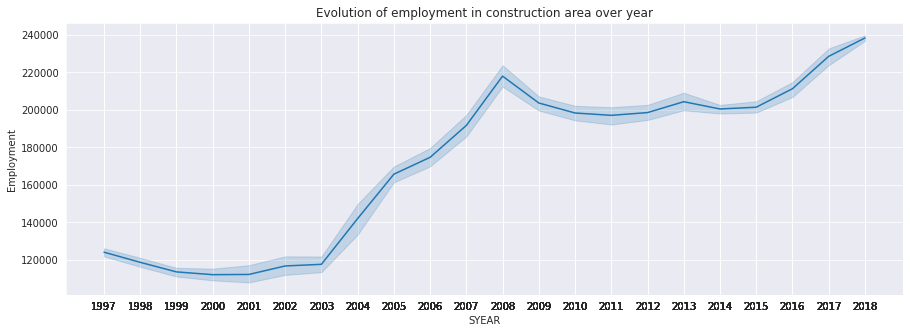

In [140]:
plt.figure(figsize=[15,5])
sns.set_style('darkgrid')
sns.lineplot(x='SYEAR', y="Employment", data=construction_df)
plt.xticks(construction_df['SYEAR'])
plt.title("Evolution of employment in construction area over year")
plt.show()

From this plot, we can conclude that the number of employment in construction increased over time from 1997 to 2018.

### III.2. Which year have the highest employment and in which month

In [132]:
final_data_output[['SYEAR','Employment']].groupby(['SYEAR']).agg(sum).nlargest(columns=["Employment"],n=5)

,Employment
SYEAR,
2018,30163500
2017,29850000
2016,28852750
2015,27954250
2014,27587500


In [135]:
final_data_output[['SYEAR','SMTH','Employment']].groupby(['SYEAR','SMTH']).agg(sum).nlargest(columns=["Employment"],n=5)

Employment
SYEAR SMTH            
2018  11       2559250
      9        2553500
      12       2553250
2017  6        2549750
2018  10       2549000

### III.3. Which year have the lowest employment and in which month

In [137]:
final_data_output[['SYEAR','Employment']].groupby(['SYEAR']).agg(sum).nsmallest(columns=["Employment"],n=5)

,Employment
SYEAR,
1997,22465000
1998,22494750
1999,22884250
2001,23238250
2000,23348750


In [139]:
final_data_output[['SYEAR','SMTH','Employment']].groupby(['SYEAR','SMTH']).agg(sum).nsmallest(columns=["Employment"],n=5)

Employment
SYEAR SMTH            
1997  1        1811250
      2        1817250
      3        1823750
1998  1        1824750
      2        1831000